In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print("Tensorflow version:",tf.__version__)
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

2023-01-25 09:04:43.507800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow version: 2.10.0


In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
num_classes=10
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()
xtrain = xtrain.reshape(60000,784)
xtest =xtest.reshape(10000,784)


11490434/11490434 [==============================] - 5s 0us/step


In [4]:
# Normalize to 0 to 1 range
xtrain, xtest = xtrain/255.0, xtest/255.0
print(xtrain.shape[0],'train_samples')
print(xtest.shape[0],'test_samples')

60000 train_samples
10000 test_samples


In [5]:
# Convert class vectors to binary class matrices
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


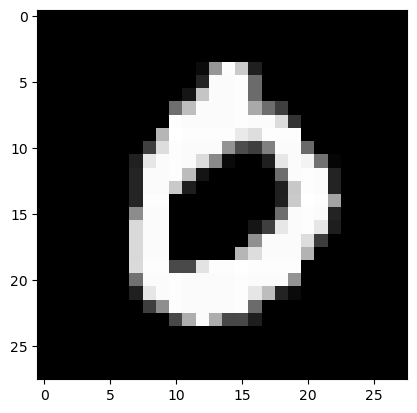

In [6]:
# Visualize data
print("Label:", ytest[3:4])
plt.imshow(xtest[3:4].reshape(28,28),cmap='gray')
plt.show()

In [7]:
# Design a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,activation='sigmoid',input_shape=(784,)),
    tf.keras.layers.Dense(32, activation= 'sigmoid'),
    tf.keras.layers.Dense(32, activation= 'sigmoid'),
    tf.keras.layers.Dense(num_classes, activation='softmax')    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


2023-01-25 09:04:52.482156: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 09:04:52.482744: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
tf_callback=tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=0)

In [9]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.layers.Dense(32, activation= 'sigmoid')

In [10]:
# Training
history = model.fit(xtrain, ytrain, epochs=2, callbacks=[tf_callback]) 

Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9772 - accuracy: 0.7292
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3578 - accuracy: 0.9050


In [11]:
#Testing
score = model.evaluate(xtest, ytest, verbose =0)
print("Test loss: " ,score[0])
print("Test accuracy: " ,score[1])

Test loss:  0.3083878457546234
Test accuracy:  0.9179999828338623


In [12]:
# Prediction
prediction = model.predict(xtest[88:89])
prediction= prediction[0]
print("Prediction\n", prediction)
print("\nThresholded output\n",(prediction>0.5)*1)

1/1 [==============================] - 0s 93ms/step
Prediction
 [2.3550770e-04 1.3914487e-04 7.3188529e-03 3.6403497e-05 9.4390400e-03
 7.8589350e-05 9.8251593e-01 7.1254397e-07 1.6001309e-04 7.5727112e-05]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


In [13]:
sum(prediction)

0.9999999222112592

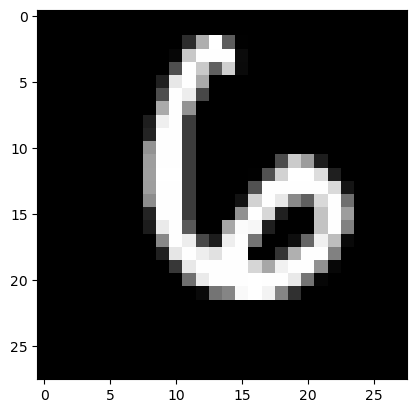

In [14]:
# Ground truth( Actual value)
plt.imshow(xtest[88:89].reshape(28,28),cmap='gray')
plt.show()

In [15]:
#%load_ext tensorboard
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.
